In [1]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
image_transforms = { 
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d havingfun/100-bollywood-celebrity-faces

100% 1.61G/1.62G [00:14<00:00, 114MB/s]
100% 1.62G/1.62G [00:14<00:00, 119MB/s]


In [4]:
! unzip 100-bollywood-celebrity-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: bollywood_celeb_faces_0/Disha_Patani/51.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/52.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/53.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/54.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/55.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/56.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/57.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/58.jpeg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/59.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/6.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/60.jpeg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/61.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/62.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/63.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/64.jpg  
  inflating: bollywood_celeb_faces_0/Disha_Patani/65.jpg  
  in

In [19]:
train_path='/content/bollywood_celeb_faces_1'
batch_size=32
num_classes=len(os.listdir(train_path))
print(num_classes)

33


In [20]:
data = {
    'train': datasets.ImageFolder(root=train_path, transform=image_transforms['train'])
}

In [21]:
idx_to_class={v:k for k,v in data['train'].class_to_idx.items()}
print(idx_to_class)

{0: 'Irrfan_Khan', 1: 'Jacqueline_Fernandez', 2: 'John_Abraham', 3: 'Juhi_Chawla', 4: 'Kajal_Aggarwal', 5: 'Kajol', 6: 'Kangana_Ranaut', 7: 'Kareena_Kapoor', 8: 'Karisma_Kapoor', 9: 'Kartik_Aaryan', 10: 'Katrina_Kaif', 11: 'Kiara_Advani', 12: 'Kriti_Kharbanda', 13: 'Kriti_Sanon', 14: 'Kunal_Khemu', 15: 'Lara_Dutta', 16: 'Madhuri_Dixit', 17: 'Manoj_Bajpayee', 18: 'Mrunal_Thakur', 19: 'Nana_Patekar', 20: 'Nargis_Fakhri', 21: 'Naseeruddin_Shah', 22: 'Nushrat_Bharucha', 23: 'Paresh_Rawal', 24: 'Parineeti_Chopra', 25: 'Pooja_Hegde', 26: 'Prabhas', 27: 'Prachi_Desai', 28: 'Preity_Zinta', 29: 'Priyanka_Chopra', 30: 'R_Madhavan', 31: 'Rajkummar_Rao', 32: 'Ranbir_Kapoor'}


In [22]:
train_data_size = len(data['train'])
# valid_data_size = len(data['valid'])

# Create iterators for the Data loaded using DataLoader module
train_data_loader = DataLoader(data['train'], batch_size=batch_size, shuffle=True)
# valid_data_loader = DataLoader(data['valid'], batch_size=batch_size, shuffle=True)

In [23]:
images,labels=next(iter(train_data_loader))
images[0].size(0)

3

In [34]:
alexnet = models.alexnet(pretrained=True)
for param in alexnet.parameters():
    param.requires_grad = False
alexnet.classifier[6] = nn.Linear(4096, 33)
alexnet.classifier.add_module("7", nn.LogSoftmax(dim = 1))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [35]:
loss_func = nn.NLLLoss()
optimizer = optim.Adam(alexnet.parameters())
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [36]:
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        # with torch.no_grad():

        #     # Set to evaluation mode
        #     model.eval()

        #     # Validation loop
        #     for j, (inputs, labels) in enumerate(valid_data_loader):
        #         inputs = inputs.to(device)
        #         labels = labels.to(device)

        #         # Forward pass - compute outputs on input data using the model
        #         outputs = model(inputs)

        #         # Compute loss
        #         loss = loss_criterion(outputs, labels)

        #         # Compute the total loss for the batch and add it to valid_loss
        #         valid_loss += loss.item() * inputs.size(0)

        #         # Calculate validation accuracy
        #         ret, predictions = torch.max(outputs.data, 1)
        #         correct_counts = predictions.eq(labels.data.view_as(predictions))

        #         # Convert correct_counts to float and then compute the mean
        #         acc = torch.mean(correct_counts.type(torch.FloatTensor))

        #         # Compute total accuracy in the whole batch and add to valid_acc
        #         valid_acc += acc.item() * inputs.size(0)

        #         #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        # avg_valid_loss = valid_loss/valid_data_size 
        # avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_train_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch+1, avg_train_loss, avg_train_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        #torch.save(model, dataset+'_model_'+str(epoch)+'.pt')
            
    return model, history

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 15
trained_model, history = train_and_validate(alexnet.to(device), loss_func, optimizer, num_epochs)

Epoch: 1/15


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 206 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 724 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 170 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 178 bytes but o

Epoch : 001, Training: Loss: 2.4211, Accuracy: 31.8204%, Time: 98.5900s
Epoch: 2/15
Epoch : 002, Training: Loss: 2.0760, Accuracy: 38.4709%, Time: 97.8866s
Epoch: 3/15
Epoch : 003, Training: Loss: 1.8240, Accuracy: 45.4854%, Time: 101.7607s
Epoch: 4/15
Epoch : 004, Training: Loss: 1.6970, Accuracy: 49.2961%, Time: 99.1234s
Epoch: 5/15
Epoch : 005, Training: Loss: 1.5809, Accuracy: 52.8398%, Time: 100.3875s
Epoch: 6/15
Epoch : 006, Training: Loss: 1.5081, Accuracy: 54.7087%, Time: 99.4974s
Epoch: 7/15
Epoch : 007, Training: Loss: 1.4445, Accuracy: 57.1359%, Time: 98.2512s
Epoch: 8/15
Epoch : 008, Training: Loss: 1.3428, Accuracy: 59.5388%, Time: 99.3927s
Epoch: 9/15
Epoch : 009, Training: Loss: 1.3193, Accuracy: 60.6553%, Time: 97.9689s
Epoch: 10/15
Epoch : 010, Training: Loss: 1.2945, Accuracy: 61.1408%, Time: 95.8567s
Epoch: 11/15
Epoch : 011, Training: Loss: 1.2380, Accuracy: 62.0631%, Time: 96.3085s
Epoch: 12/15
Epoch : 012, Training: Loss: 1.1956, Accuracy: 63.6165%, Time: 96.3944s

In [40]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    
    transform = image_transforms['test']

    test_image = Image.open(test_image_name)
    plt.imshow(test_image)
    
    test_image_tensor = transform(test_image)

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        ps = torch.exp(out)
        topk, topclass = ps.topk(33, dim=1)
        topk=torch.Tensor.cpu(topk)
        topclass=torch.Tensor.cpu(topclass)
        print(topk) # top probability
        # classes with top probability
        
        print(topclass)
        for i in range(33):
            print("Predcition", i+1, ":", idx_to_class[topclass.numpy()[0][i]], ", Score: ", topk.numpy()[0][i])

tensor([[9.6461e-01, 1.2028e-02, 5.3446e-03, 4.1820e-03, 3.9374e-03, 2.3843e-03,
         1.5644e-03, 1.5215e-03, 1.0096e-03, 7.8440e-04, 4.8988e-04, 4.1482e-04,
         3.9347e-04, 2.7722e-04, 2.2414e-04, 2.1412e-04, 1.6234e-04, 1.5462e-04,
         8.9338e-05, 4.9290e-05, 3.1941e-05, 2.9981e-05, 2.6623e-05, 2.5581e-05,
         1.8619e-05, 9.9042e-06, 5.2046e-06, 4.7413e-06, 2.5761e-06, 2.4410e-06,
         1.8330e-06, 1.5987e-06, 7.8140e-07]])
tensor([[ 8,  6, 16,  1,  4,  7, 11,  3,  2, 10, 24, 18, 25, 12, 29, 14, 22, 28,
         27, 32, 20, 23, 26,  5, 15, 13, 21, 31, 30,  0, 19,  9, 17]])
Predcition 1 : Karisma_Kapoor , Score:  0.9646128
Predcition 2 : Kangana_Ranaut , Score:  0.012028162
Predcition 3 : Madhuri_Dixit , Score:  0.0053446083
Predcition 4 : Jacqueline_Fernandez , Score:  0.004181953
Predcition 5 : Kajal_Aggarwal , Score:  0.003937396
Predcition 6 : Kareena_Kapoor , Score:  0.0023843031
Predcition 7 : Kiara_Advani , Score:  0.0015644055
Predcition 8 : Juhi_Chawla ,

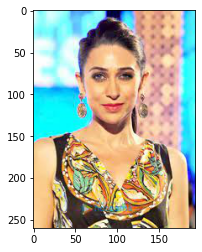

In [43]:
predict(trained_model,'/content/download.jpeg')

tensor([[5.0129e-01, 3.1403e-01, 3.2854e-02, 3.1332e-02, 3.0000e-02, 1.9205e-02,
         1.6401e-02, 1.6045e-02, 1.3591e-02, 1.2175e-02, 1.0778e-02, 1.2243e-03,
         6.4550e-04, 1.3399e-04, 9.2268e-05, 5.7077e-05, 3.4447e-05, 3.3971e-05,
         2.4753e-05, 2.2468e-05, 6.5115e-06, 6.2974e-06, 5.2940e-06, 3.8722e-06,
         2.9683e-06, 2.0666e-06, 1.9170e-06, 1.8282e-06, 1.0310e-06, 6.5037e-07,
         4.7411e-07, 2.5700e-07, 1.4944e-08]])
tensor([[ 0,  2, 31, 17, 23,  9, 21, 14, 32, 19, 26, 30, 11,  5, 27, 25, 18, 22,
         29,  8, 12,  7,  6,  4,  1, 10, 24, 15, 13, 16,  3, 20, 28]])
Predcition 1 : Irrfan_Khan , Score:  0.50128555
Predcition 2 : John_Abraham , Score:  0.31403172
Predcition 3 : Rajkummar_Rao , Score:  0.032854423
Predcition 4 : Manoj_Bajpayee , Score:  0.031331576
Predcition 5 : Paresh_Rawal , Score:  0.03000007
Predcition 6 : Kartik_Aaryan , Score:  0.019204924
Predcition 7 : Naseeruddin_Shah , Score:  0.016401468
Predcition 8 : Kunal_Khemu , Score:  0.016

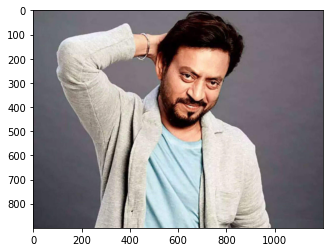

In [42]:
predict(trained_model,'/content/2679019.jpg')